In [16]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 12

In [18]:
mpl.rcParams.update(mpl.rcParamsDefault)

## Kodowanie zdań

In [8]:
from datasets import wikiset
wikiset.get_raw_lines(wikiset.get(),'data/4074782')

d:\misc\projects\python\magister\data\wiki_727K.tar.bz2 found: True
d:\misc\projects\python\magister\data\wiki_test_50.tar.bz2 found: True
['data/111174', 'data/2640796', 'data/2917712', 'data/10037144', 'data/2952485', 'data/3275069', 'data/6146176', 'data/6544206', 'data/1928841', 'data/12720971', 'data/28187', 'data/7445232', 'data/109461', 'data/7674758', 'data/1198312', 'data/3384438', 'data/2025011', 'data/988580', 'data/149766', 'data/599217', 'data/3881783', 'data/2842974', 'data/31444', 'data/1057453', 'data/1276536', 'data/338825', 'data/9652769', 'data/582816', 'data/961796', 'data/1064845', 'data/380143', 'data/5160544', 'data/7150404', 'data/9387798', 'data/2651177', 'data/7370490', 'data/44426', 'data/6261767', 'data/426889', 'data/6540154', 'data/10648433', 'data/123319', 'data/4074782', 'data/32431', 'data/910628', 'data/8718322', 'data/751683', 'data/2070518', 'data/4823815', 'data/3475652']


['========,1,preface.\n',
 'IceRocket is an Internet search engine which specializes in real-time search.\n',
 'Based in Dallas, Texas, it launched in 2004 hoping to market itself solely through word of mouth.\n',
 'IceRocket is backed by Mark Cuban and headquartered in Dallas, Texas.\n',
 'The company has received angel funding from Mr. Cuban.\n',
 '========,2,History and growth.\n',
 'Icerocket launched in 2004.\n',
 'The search engine originally launched with features designed to make web searches on a PDA much easier, for instance allowing users to email a query to the engine and receive their results back in response.\n',
 'Icerocket had an early licensing deal with Gofish.com In August 2011, it was announced that IceRocket had been acquired by the Meltwater Group.\n',
 '========,2,Service.\n',
 'IceRocket is generally for blog searches but has expanded into searching the popular social networking websites Twitter and Facebook as well as allowing searching of news and the world wi

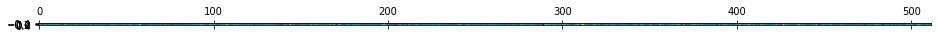

In [4]:
import numpy as np
from datasets import EmbeddedDataset
from algorithms import segments, block_comparison,graphseg
import matplotlib.pyplot as plt
with EmbeddedDataset('wiki_segments.npz') as ds:
    Embs = ds[ds.get_embeddings()[-3:-1]]

#plt.matshow(Embs[0])
u =np.sum(Embs[0],0)
u = u/np.sqrt(u.dot(u.T))

plt.matshow([u])




[ 4  7 19 21 25 30 37 40 45 55 63 71 73]
[ 4  7 19 21 25 30 37 40 45 55 63 71 73]
[ 10  94 107 110]
[ 10  94 107 110]
[ 5 19 51 56 68]
[ 5 19 51 56 68]
[ 5 19 51 56 68]
[ 5 19 51 56 68]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


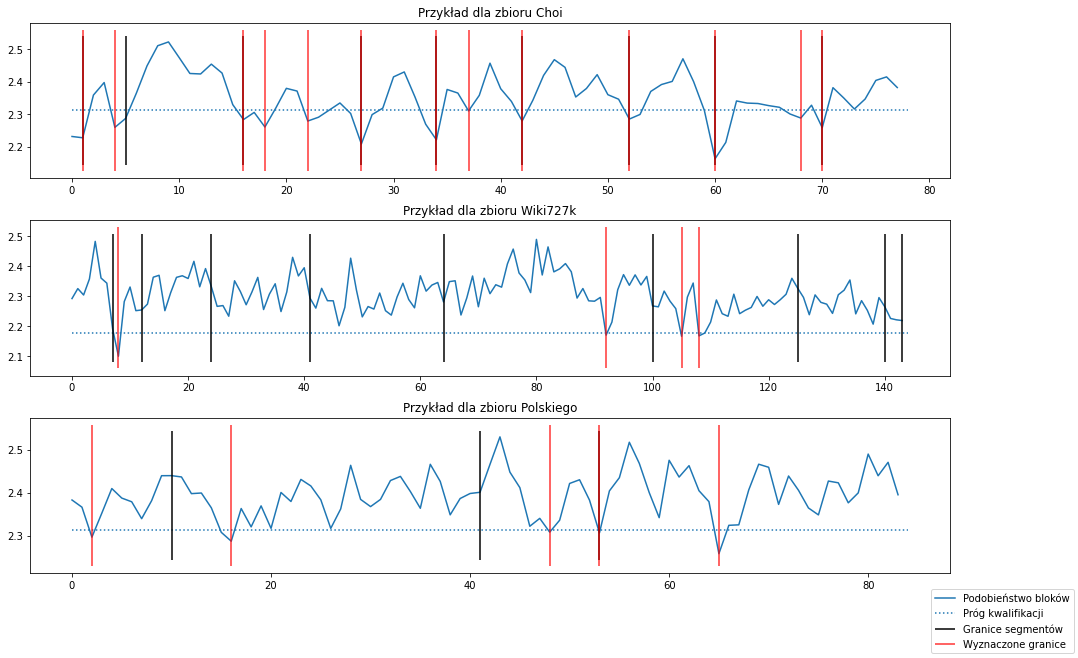

In [9]:
plbest = block_comparison.with_params(block_mode = 'max', cmp_mode='acos', block_size=4,std_cutoff=1.5)
wikibest = block_comparison.with_params(block_mode='max', cmp_mode='acos', block_size=3, std_cutoff=2.0)
choibest = block_comparison.with_params(block_mode='max', cmp_mode='acos',block_size=4,std_cutoff=0.5)
with EmbeddedDataset('wiki_segments.npz') as ds:
    wemb = ds[ds.get_embeddings()[-1]]
    wseg = ds[ds.segmentation(ds.get_embeddings()[-1])]
with EmbeddedDataset('choi_segments.npz') as ds:
    cemb = ds[ds.get_embeddings()[-1]]
    cseg = ds[ds.segmentation(ds.get_embeddings()[-1])]
with EmbeddedDataset('pl_cnn.npz') as ds:
    plemb = ds[ds.get_embeddings()[-1]]
    plseg = ds[ds.segmentation(ds.get_embeddings()[-1])]


def plot_similarity(embs, ax,cutoff = 1.0,block_size = 3):
    BS = block_size
    v = np.lib.stride_tricks.sliding_window_view(embs,BS,0)
    v = block_comparison.encode_blocks(v,'max')
    score = np.array([block_comparison.similarity_measure(v[i],v[i+BS],'acos') for i in range(len(v)-BS)])
    m,s = np.mean(score),np.std(score)
    ax.plot(score,label='Podobieństwo bloków')
    ax.hlines(m-cutoff*s,0,len(score),linestyles='dotted',label='Próg kwalifikacji')
def plot_segments(segs, ax, is_array= False, block_size = 1,color='red', label = 'Granice segmentów',**kwargs):
    if not is_array:
        segs = segments.tags_to_array(segs)
    segs = np.where(segs == 1)[0] - (block_size-1)
    ax.vlines(segs,*ax.get_ylim(),colors=[color],label=label,**kwargs)
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(3,1,1)
fig.tight_layout(h_pad = 2.5, rect=(0,0.1,0.9,0.9))
ax.title.set_text("Przykład dla zbioru Choi")
plot_similarity(cemb,ax,block_size=4, cutoff=0.5)
plot_segments(cseg,ax,block_size=4,color='black')
plot_segments(choibest(cemb),ax,color='red',block_size=3,alpha=0.8)

ax = plt.subplot(3,1,2)
ax.title.set_text("Przykład dla zbioru Wiki727k")
plot_similarity(wemb,ax,cutoff=2.0)
plot_segments(wseg,ax,block_size=4,color='black')
plot_segments(wikibest(wemb),ax,color='red',block_size=2,alpha=0.8)

ax = plt.subplot(3,1,3)
ax.title.set_text("Przykład dla zbioru Polskiego")
plot_similarity(plemb,ax,cutoff=1.5,block_size=4)
plot_segments(plseg,ax,color='black')
plot_segments(plbest(plemb),ax,color='red',block_size=3,label='Wyznaczone granice',alpha=0.8)
print(plbest(plemb))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')


segments: [ 10  15  27  44  67 103 128 143 146]
segments: [ 4  8 19 30 37 45 55 63 73]
segments: [ 15  33  44  67  80  97 131 172]
segments: [ 10  94 107 110]
segments: [ 4  7 19 21 30 37 45 55 63 73]
segments: [ 23  66  89 121 140 154 173]
segments: [ 10  14  18  29  35  38  44  53  57  62  68  72  79  94 100 107 110 115
 129 133 137 140]
segments: [ 4  7 21 30 37 41 45 55 63 73 76]
segments: [ 75 140]


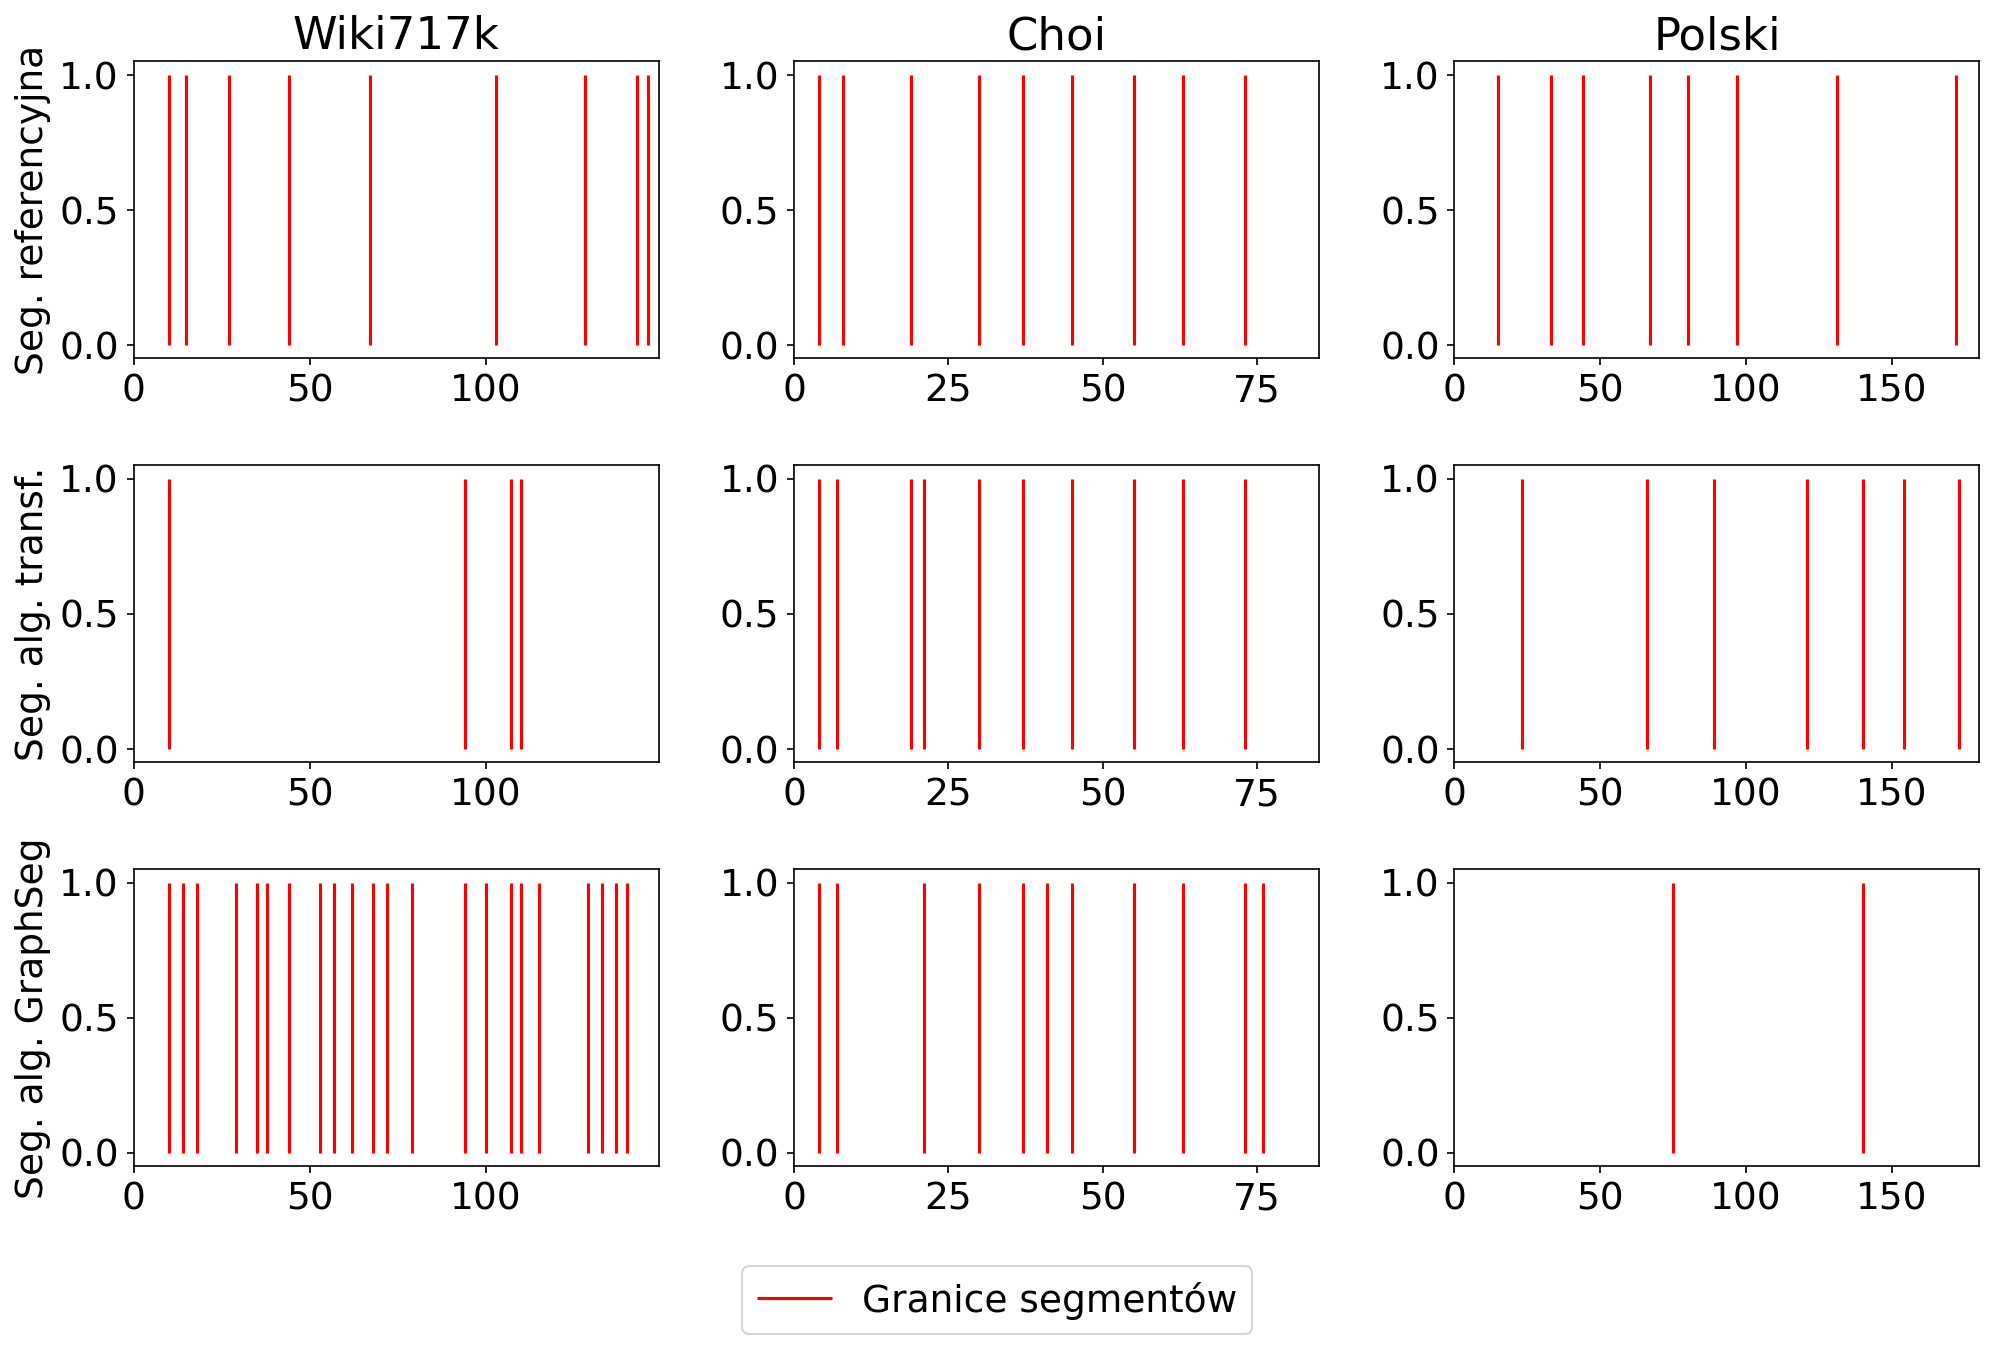

In [7]:
import numpy as np
from datasets import EmbeddedDataset
from algorithms import segments, block_comparison,graphseg
import matplotlib.pyplot as plt
def plot_segments(segs, ax, is_array= False, block_size = 1, ):
    if not is_array:
        segs = segments.tags_to_array(segs)
    segs = np.where(segs == 1)[0] - (block_size-1)
    ax.vlines(segs,*ax.get_ylim(),colors=['red'],label='Granice segmentów')
    print(f"segments: {segs}")
plbest = block_comparison.with_params(block_mode = 'mean', cmp_mode='dot', block_size=4,std_cutoff=1.5)
wikibest = block_comparison.with_params(block_mode='max', cmp_mode='acos', block_size=3, std_cutoff=2.0)
choibest = block_comparison.with_params(block_mode='v-mean', cmp_mode='acos',block_size=4,std_cutoff=0.5)
gspl = graphseg.with_params(threshold = 0.35, n_min_seg=10)
gswiki = graphseg.with_params(threshold = 0.45)
gschoi = graphseg.with_params(threshold = 0.2)

with EmbeddedDataset('wiki_segments.npz') as ds:
    wemb = ds[ds.get_embeddings()[-1]]
    wseg = ds[ds.segmentation(ds.get_embeddings()[-1])]
    winf_bc = wikibest(wemb)
    winf_gs = gswiki(wemb)

with EmbeddedDataset('choi_segments.npz') as ds:
    cemb = ds[ds.get_embeddings()[-1]]
    cseg = ds[ds.segmentation(ds.get_embeddings()[-1])]
    cinf_bc = choibest(cemb)
    cinf_gs = gschoi(cemb)
    
    
with EmbeddedDataset('pl_cnn.npz') as ds:
    plemb = ds[ds.get_embeddings()[-15]]
    plseg = ds[ds.segmentation(ds.get_embeddings()[-15])]
    plinf_bc = plbest(plemb)
    plinf_gs = gspl(plemb)

fig = plt.figure(figsize=(15,10))


ax=plt.subplot(3,3,1)
fig.tight_layout(h_pad = 1.5,w_pad=2.5, rect=(0,0.1,0.9,0.9))
ax.set_xlim(0,len(wseg))
ax.title.set_text("Wiki717k")
ax.set_ylabel("Seg. referencyjna")
plot_segments(wseg,ax)
ax=plt.subplot(3,3,2)
ax.set_xlim(0,len(cseg))
ax.title.set_text("Choi")
plot_segments(cseg,ax)
ax=plt.subplot(3,3,3)
ax.set_xlim(0,len(plseg))
ax.title.set_text("Polski")
plot_segments(plseg,ax)

ax=plt.subplot(3,3,4)
ax.set_xlim(plt.subplot(3,3,1).get_xlim())
ax.set_ylabel("Seg. alg. transf.")
plot_segments(winf_bc,ax,is_array=True)
ax=plt.subplot(3,3,5)
ax.set_xlim(plt.subplot(3,3,2).get_xlim())
plot_segments(cinf_bc,ax,is_array=True)
ax=plt.subplot(3,3,6)
ax.set_xlim(plt.subplot(3,3,3).get_xlim())
plot_segments(plinf_bc,ax,is_array=True)

ax=plt.subplot(3,3,7)
ax.set_xlim(plt.subplot(3,3,1).get_xlim())
ax.set_ylabel("Seg. alg. GraphSeg")
plot_segments(winf_gs,ax,is_array=True)
ax=plt.subplot(3,3,8)
ax.set_xlim(plt.subplot(3,3,2).get_xlim())
plot_segments(cinf_gs,ax,is_array=True)
ax=plt.subplot(3,3,9)
ax.set_xlim(plt.subplot(3,3,3).get_xlim())
plot_segments(plinf_gs,ax,is_array=True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')

# Metody segmentacji


Evaluating:[..........][127/127] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0h 0min 1s][eta: 0h 0min 0s]   


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


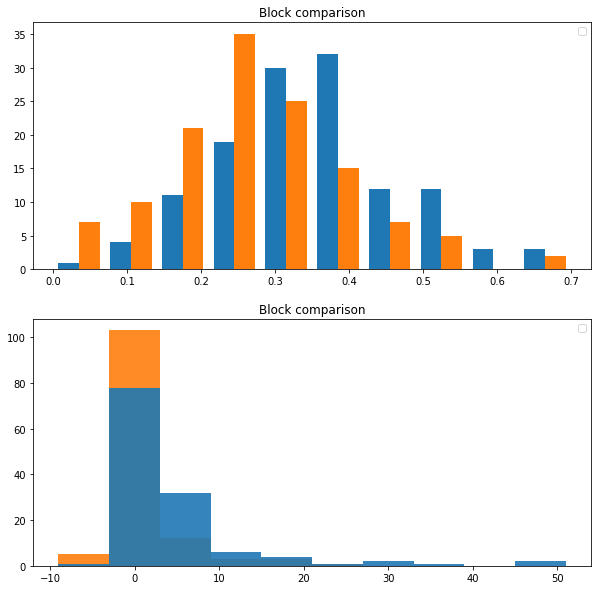

In [3]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
b_diff = block_comparison.with_params(block_mode='max', block_size=3,std_cutoff=1.0,cmp_mode='acos',check_minimum=True)
gs = graphseg.with_params(threshold = 0.5)

with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    p1,w1,d1 = evaluate_segmenter(ds,gs,ds.mean_segment_length()//2,seg_diff=True)
    p2,w2,d2 = evaluate_segmenter(ds,b_diff,ds.mean_segment_length()//2, seg_diff=True)

    ax = plt.subplot(2,1,1)
    ax.title.set_text("Block comparison")
    plt.hist([w1,w2])
    plt.legend()

    ax = plt.subplot(2,1,2)
    ax.title.set_text("Block comparison")
    plt.hist([d1,d2],histtype='stepfilled',alpha=0.9)
    plt.legend()



Evaluating:[..........][100/100] => DONE [0h 0min 3s][eta: 0h 0min 0s]   txt_emb [0h 0min 3s][eta: 0h 0min 0s]   min 0s]   in 1s]   
Evaluating:[..........][100/100] => DONE [0h 0min 2s][eta: 0h 0min 0s]   txt_emb [0h 0min 2s][eta: 0h 0min 0s]   min 0s]   in 1s]   
Evaluating:[..........][100/100] => DONE [0h 0min 3s][eta: 0h 0min 0s]   txt_emb [0h 0min 3s][eta: 0h 0min 0s]   min 0s]   in 1s]   
Evaluating:[..........][100/100] => DONE [0h 0min 3s][eta: 0h 0min 0s]   txt_emb [0h 0min 3s][eta: 0h 0min 0s]   min 0s]   in 1s]   
Evaluating:[..........][100/100] => DONE [0h 0min 3s][eta: 0h 0min 0s]   txt_emb [0h 0min 3s][eta: 0h 0min 0s]   min 1s]   in 2s]   
Evaluating:[..........][100/100] => DONE [0h 0min 3s][eta: 0h 0min 0s]   txt_emb [0h 0min 3s][eta: 0h 0min 0s]   min 1s]   in 2s]   
Evaluating:[..........][100/100] => DONE [0h 0min 4s][eta: 0h 0min 0s]   txt_emb [0h 0min 4s][eta: 0h 0min 0s]   min 1s]   in 2s]   
Evaluating:[..........][100/100] => DONE [0h 0min 4s][eta: 0h 0min 0s

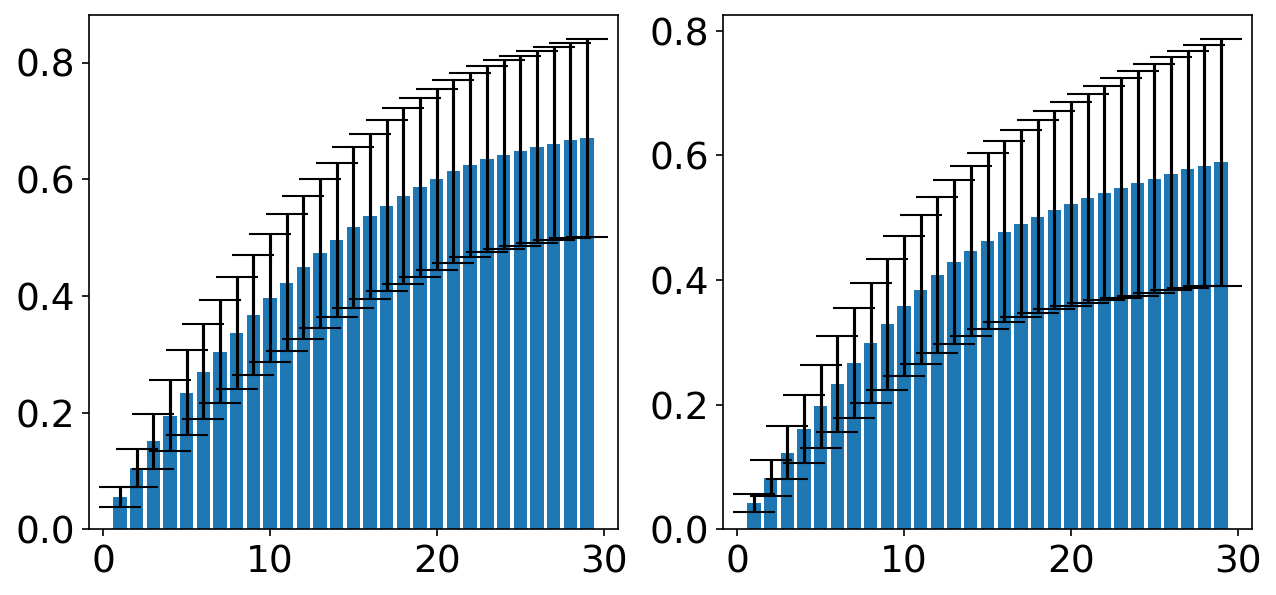

In [14]:

from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset, small_pl
import matplotlib.pyplot as plt
import numpy as np


def make_wd_blocksize_plot(ax,ds, x_range, seg_alg,weighted, type= 'wd'):
    Ws,Errs = [],[]
    Ps,pErrs = [],[]
    for i in x_range:
        p,w = evaluate_segmenter(ds,seg_alg,i)
        if 'wd' in type:
            Ws.append(np.mean(w))
            Errs.append(np.std(w))
        if 'pk'in type:
            Ps.append(np.mean(p))
            pErrs.append(np.std(p))
    if 'wd' in type:
        ax.bar(x_range,Ws,yerr=Errs,ecolor='black', capsize=10)
    if 'pk' in type:
        ax.bar(x_range,Ps,yerr=pErrs,ecolor='black', capsize=10)


plbest = block_comparison.with_params(block_mode = 'mean', cmp_mode='dot', block_size=4,std_cutoff=1.5)
wikibest = block_comparison.with_params(block_mode='max', cmp_mode='acos', block_size=3, std_cutoff=2.0)
gs  = graphseg.with_params(threshold = 0.4, n_min_seg=10)
plt.figure(figsize=(10,10))
with EmbeddedDataset('pl_cnn.npz') as ds:
    ax = plt.subplot(2,2,2)
    make_wd_blocksize_plot(ax,ds,range(1,30),gs,False)
    ax = plt.subplot(2,2,1)
    make_wd_blocksize_plot(ax,ds,range(1,30),plbest,False)
    





In [1]:

from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset, small_pl
import matplotlib.pyplot as plt
import numpy as np

plbest = block_comparison.with_params(block_mode = 'mean', cmp_mode='dot', block_size=4,std_cutoff=1.5)
wikibest = block_comparison.with_params(block_mode='max', cmp_mode='acos', block_size=3, std_cutoff=2.0)
choibest = block_comparison.with_params(block_mode='v-mean', cmp_mode='acos',block_size=4,std_cutoff=0.5)
gspl = graphseg.with_params(threshold = 0.35, n_min_seg=10)
gswiki = graphseg.with_params(threshold = 0.45)
gschoi = graphseg.with_params(threshold = 0.2)
with EmbeddedDataset('pl_cnn.npz') as ds:
    p,w = evaluate_segmenter(ds,plbest,ds.mean_segment_length()//2)
    print(f'Polski BS: {np.mean(p)}')
    #p,w = evaluate_segmenter(ds,gspl,ds.mean_segment_length()//2)
    #print(f'Polski GS: {np.mean(p)}')

with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:

    p,w = evaluate_segmenter(ds,wikibest,ds.mean_segment_length()//2)
    print(f'Wiki BS: {np.mean(p)}')
    #p,w = evaluate_segmenter(ds,gswiki,ds.mean_segment_length()//2)
    #print(f'Wiki GS: {np.mean(p)}')

with EmbeddedDataset('choi_segments.npz') as ds:
    p,w = evaluate_segmenter(ds,choibest,ds.mean_segment_length()//2)
    print(f'Choi BS: {np.mean(p)}')
    #p,w = evaluate_segmenter(ds,gschoi,ds.mean_segment_length()//2)
    #print(f'Choi GS: {np.mean(p)}')


Evaluating:[..........][100/100] => DONE [0h 0min 0s][eta: 0h 0min 0s]   txt_emb [0h 0min 0s][eta: 0h 0min 0s]   min 0s]   in 0s]   
Polski BS: 0.4623342108549046
Evaluating:[..........][127/127] => DONE [0h 0min 0s][eta: 0h 0min 0s]   0h 0min 0s][eta: 0h 0min 0s]   
Wiki BS: 0.31182398387581844
Evaluating:[..........][300/300] => DONE [0h 0min 1s][eta: 0h 0min 0s]   0min 0s]    
Choi BS: 0.10587271341851827


In [2]:
from evaluation import evaluate_segmenter
from algorithms import simple, graphseg, block_comparison
from datasets import EmbeddedDataset
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
gs = block_comparison.with_params(block_mode='max',cmp_mode='cos',whiten=True)
sbs = block_comparison.with_params(block_mode='max',cmp_mode='acos',whiten=True)
sbs1 = block_comparison.with_params(block_mode='max',cmp_mode='dot',whiten=True)
sbs2 = block_comparison.with_params(**{'cmp_mode': 'acos', 'block_size': 3, 'block_mode': 'max', 'std_cutoff':2.0})
with EmbeddedDataset('wiki_segments_trans_300.npz') as ds:
    p1,w1 = evaluate_segmenter(ds,gs,4)
    p2,w2 = evaluate_segmenter(ds,sbs,4)
    p3,w3 = evaluate_segmenter(ds,sbs1,4)
    p4,w4 = evaluate_segmenter(ds,sbs2,4)
    ax = plt.subplot(1,1,1)
    ax.title.set_text("Wiki - WindowDiff")
    plt.hist([w1,w2,w3,w4], label = ["Cos", "Acos", "dot","sum"])
    plt.legend()




KeyboardInterrupt: 

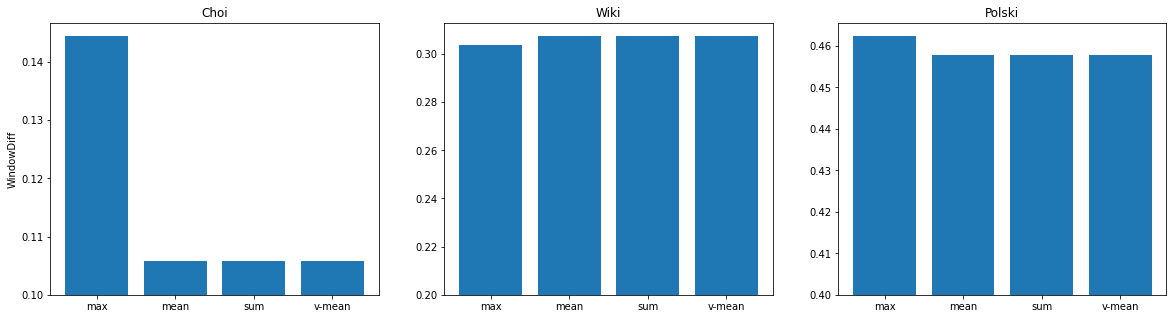

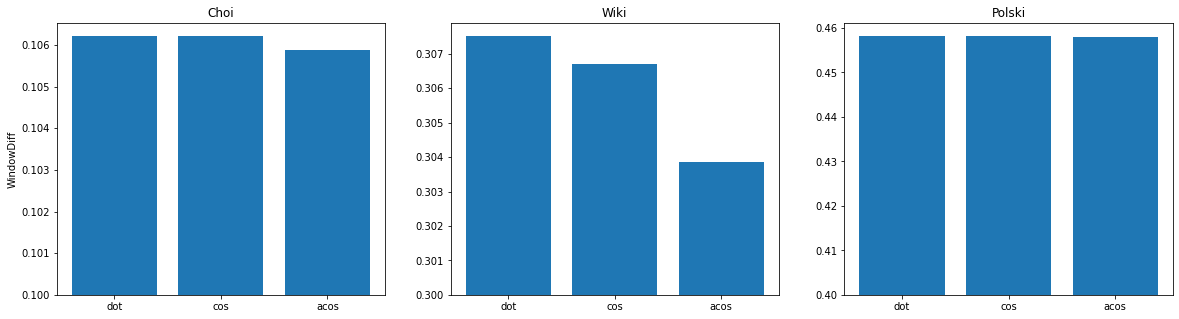

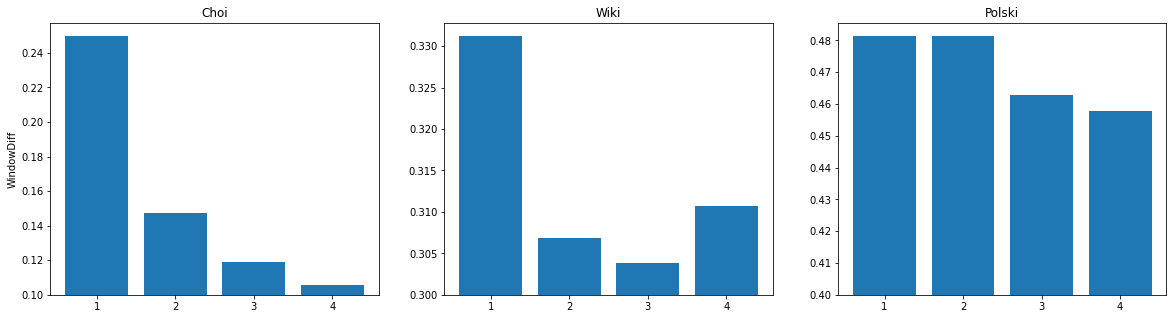

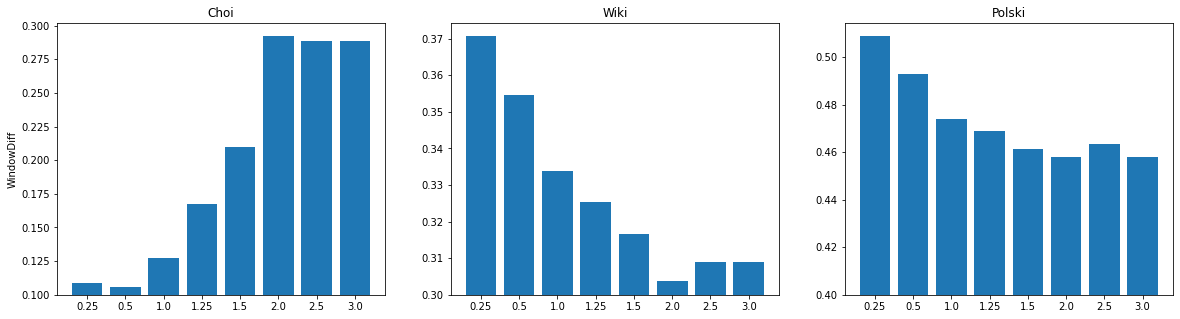

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_wiki = pd.read_csv('gridsearch-wiki-3001.csv')
df_choi = pd.read_csv('gridsearch-choi1.csv')
df_pl = pd.read_csv('gridsearch-plcnn1.csv')

def plot_bar_cmp_mean(ax,df,attrib_name, attrib_values, target_attrib,bottom=0,**kwargs):
    x = np.arange(len(attrib_values))
    Means = np.array([df.loc[df[attrib_name]==val,target_attrib].mean() for val in attrib_values]) - bottom
    Std = [df.loc[df[attrib_name]==val,target_attrib].std() for val in attrib_values]
    ax.bar(x,Means,yerr=Std,tick_label=attrib_values,bottom = bottom,ecolor='black', capsize=10,**kwargs)

def plot_bar_cmp_min(ax,df,attrib_name, attrib_values, target_attrib,bottom=0,**kwargs):
    x = np.arange(len(attrib_values))
    Means = np.array([df.loc[df[attrib_name]==val,target_attrib].min() for val in attrib_values]) - bottom
    ax.bar(x,Means,tick_label=attrib_values,bottom = bottom,ecolor='black', capsize=10,**kwargs)
    
fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
#plot_bar_cmp_mean(ax,df_choi,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.15,alpha=0.5,label="Średni wynik")
plot_bar_cmp_min(ax,df_choi,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.1)
ax.set_ylabel("WindowDiff")
ax.title.set_text("Choi")
ax = plt.subplot(1,3,2)
#plot_bar_cmp_mean(ax,df_wiki,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.2,alpha=0.5,label="Średni wynik")
plot_bar_cmp_min(ax,df_wiki,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.2)

ax.title.set_text("Wiki")
ax = plt.subplot(1,3,3)
#plot_bar_cmp_mean(ax,df_pl,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.07,alpha=0.5,label="Średni wynik")
plot_bar_cmp_min(ax,df_pl,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.4)
ax.title.set_text("Polski")

plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
ax.title.set_text("Choi")
plot_bar_cmp_min(ax,df_choi,'cmp_mode',['dot','cos','acos'],'windowdiff_mean', bottom=0.10,label="Najlepszy wynik")
ax.set_ylabel("WindowDiff")
ax = plt.subplot(1,3,2)
ax.title.set_text("Wiki")
plot_bar_cmp_min(ax,df_wiki,'cmp_mode',['dot','cos','acos'],'windowdiff_mean', bottom=0.30,label="Najlepszy wynik")

ax = plt.subplot(1,3,3)
ax.title.set_text("Polski")
plot_bar_cmp_min(ax,df_pl,'cmp_mode',['dot','cos','acos'],'windowdiff_mean', bottom=0.40,label="Najlepszy wynik")


plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
ax.title.set_text("Choi")
plot_bar_cmp_min(ax,df_choi,'block_size',[1,2,3,4],'windowdiff_mean', bottom=0.1,label="Najlepszy wynik")
ax.set_ylabel("WindowDiff")

ax = plt.subplot(1,3,2)
ax.title.set_text("Wiki")
plot_bar_cmp_min(ax,df_wiki,'block_size',[1,2,3,4],'windowdiff_mean', bottom=0.3,label="Najlepszy wynik")

ax = plt.subplot(1,3,3)
ax.title.set_text("Polski")
plot_bar_cmp_min(ax,df_pl,'block_size',[1,2,3,4],'windowdiff_mean', bottom=0.40,label="Najlepszy wynik")

plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
ax.title.set_text("Choi")
plot_bar_cmp_min(ax,df_choi,'std_cutoff',[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0],'windowdiff_mean', bottom=0.1,label="Najlepszy wynik")
ax.set_ylabel("WindowDiff")

ax = plt.subplot(1,3,2)
ax.title.set_text("Wiki")
plot_bar_cmp_min(ax,df_wiki,'std_cutoff',[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0],'windowdiff_mean', bottom=0.3,label="Najlepszy wynik")

ax = plt.subplot(1,3,3)
ax.title.set_text("Polski")
plot_bar_cmp_min(ax,df_pl,'std_cutoff',[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0],'windowdiff_mean', bottom=0.4,label="Najlepszy wynik")






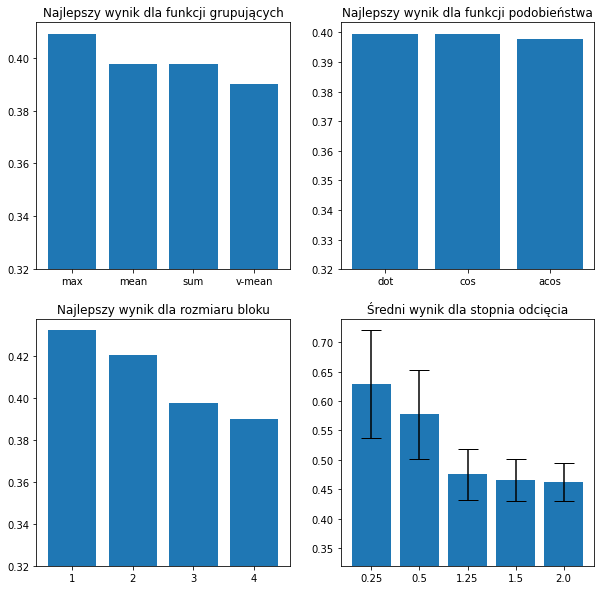

In [17]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
plot_bar_cmp_min(ax,df,'block_mode',['max','mean','sum','v-mean'],'pk_mean', bottom=0.320)
ax.title.set_text("Najlepszy wynik dla funkcji grupujących")
ax = plt.subplot(2,2,2)
plot_bar_cmp_min(ax,df,'cmp_mode',['dot','cos','acos'],'pk_mean', bottom=0.32)
ax.title.set_text("Najlepszy wynik dla funkcji podobieństwa")
ax = plt.subplot(2,2,3)
plot_bar_cmp_min(ax,df,'block_size',[1,2,3,4],'pk_mean', bottom=0.32)
ax.title.set_text("Najlepszy wynik dla rozmiaru bloku")
ax = plt.subplot(2,2,4)
plot_bar_cmp_mean(ax,df,'std_cutoff',[0.25,0.5,1.25,1.5,2.0],'pk_mean',bottom=0.32)
ax.title.set_text("Średni wynik dla stopnia odcięcia")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_wiki = pd.read_csv('gridsearch-wiki-3001.csv')
df_choi = pd.read_csv('gridsearch-choi1.csv')
df_pl = pd.read_csv('gridsearch-plcnn1.csv')

df_wiki.loc[df_wiki.windowdiff_mean == df_wiki.windowdiff_mean.min()]

,Unnamed: 0,block_mode,block_size,check_minimum,cmp_mode,std_cutoff,substract_mean,whiten,windowdiff_mean,windowdiff_std,pk_mean,pk_std,mean_seg_bias,std_seg_bias
69,69,max,3,True,acos,2.0,False,False,0.303848,0.154866,0.355264,0.182037,-2.401575,3.294615


In [2]:
df_choi.loc[df_choi.windowdiff_mean == df_choi.windowdiff_mean.min()]

,Unnamed: 0,block_mode,block_size,check_minimum,cmp_mode,std_cutoff,substract_mean,whiten,windowdiff_mean,windowdiff_std,pk_mean,pk_std,mean_seg_bias,std_seg_bias
185,185,mean,4,True,acos,0.5,False,False,0.105873,0.061854,0.114062,0.065435,0.493333,1.315278
281,281,sum,4,True,acos,0.5,False,False,0.105873,0.061854,0.114062,0.065435,0.493333,1.315278
377,377,v-mean,4,True,acos,0.5,False,False,0.105873,0.061854,0.114062,0.065435,0.493333,1.315278


In [4]:
df_pl.loc[df_pl.windowdiff_mean == df_pl.windowdiff_mean.min()]

,Unnamed: 0,block_mode,block_size,check_minimum,cmp_mode,std_cutoff,substract_mean,whiten,windowdiff_mean,windowdiff_std,pk_mean,pk_std,mean_seg_bias,std_seg_bias
191,191,mean,4,True,acos,3.0,False,False,0.457878,0.149094,0.521762,0.155229,0.28,1.568949
287,287,sum,4,True,acos,3.0,False,False,0.457878,0.149094,0.521762,0.155229,0.28,1.568949
383,383,v-mean,4,True,acos,3.0,False,False,0.457878,0.149094,0.521762,0.155229,0.28,1.568949


In [ ]:
import segments
def visualise(ds,ax,segmenter, embeddings):
    for emb in embeddings:
        seg =  ds.segmentation(emb)
        inferred = segmenter(ds[emb])
        seg_true = segments.tags_to_array(ds[seg])

# Koniec

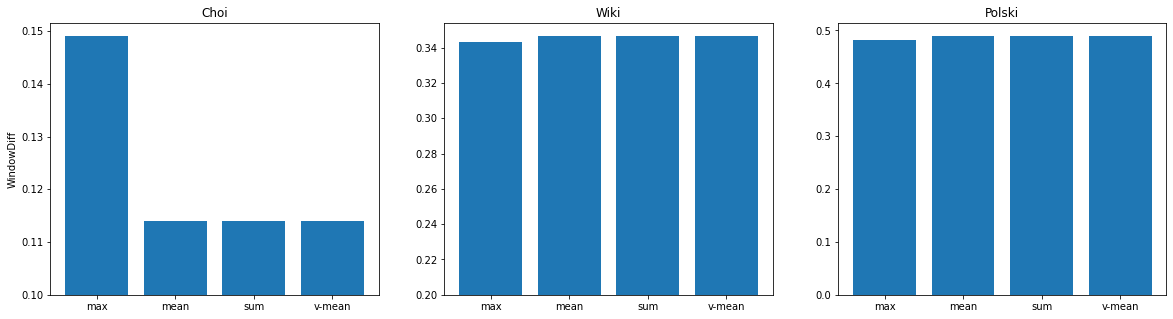

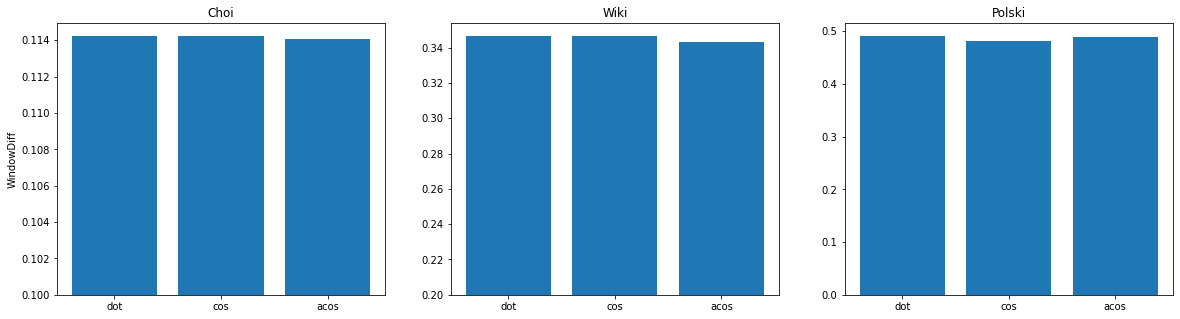

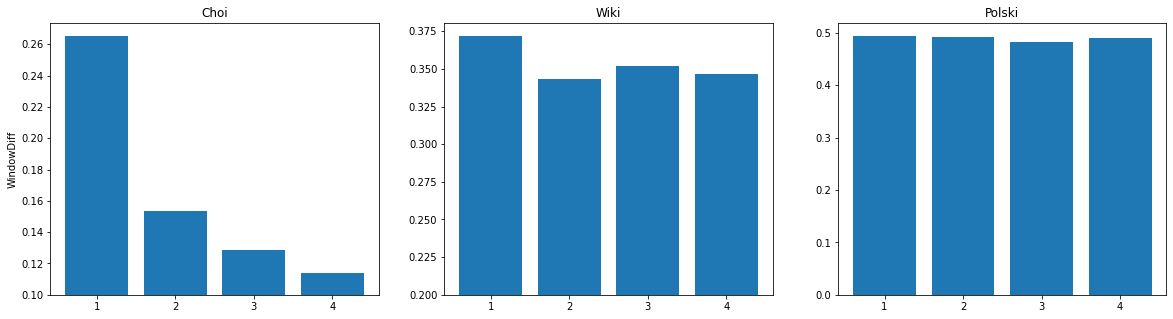

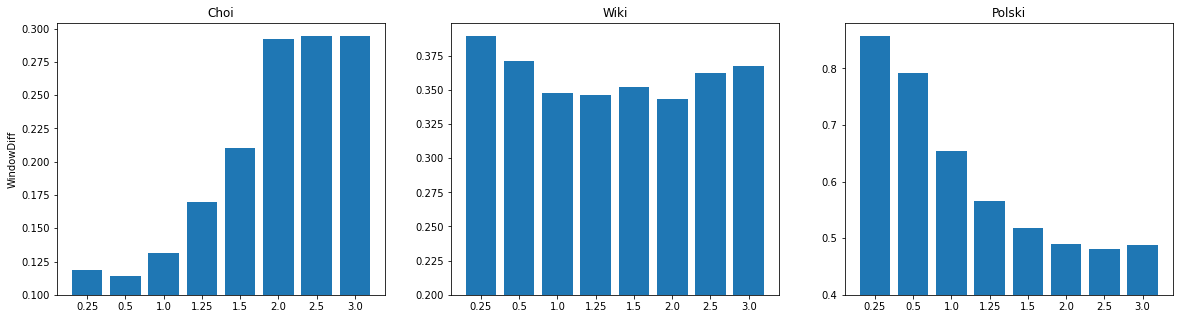

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_wiki = pd.read_csv('gridsearch-wiki-3001.csv')
df_choi = pd.read_csv('gridsearch-choi1.csv')
df_pl = pd.read_csv('gridsearch-plcnn1.csv')
target = 'pk_mean'
def plot_bar_cmp_mean(ax,df,attrib_name, attrib_values, target_attrib,bottom=0,**kwargs):
    x = np.arange(len(attrib_values))
    Means = np.array([df.loc[df[attrib_name]==val,target_attrib].mean() for val in attrib_values]) - bottom
    Std = [df.loc[df[attrib_name]==val,target_attrib].std() for val in attrib_values]
    ax.bar(x,Means,yerr=Std,tick_label=attrib_values,bottom = bottom,ecolor='black', capsize=10,**kwargs)

def plot_bar_cmp_min(ax,df,attrib_name, attrib_values, target_attrib,bottom=0,**kwargs):
    x = np.arange(len(attrib_values))
    Means = np.array([df.loc[df[attrib_name]==val,target_attrib].min() for val in attrib_values]) - bottom
    ax.bar(x,Means,tick_label=attrib_values,bottom = bottom,ecolor='black', capsize=10,**kwargs)
    
fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
#plot_bar_cmp_mean(ax,df_choi,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.15,alpha=0.5,label="Średni wynik")
plot_bar_cmp_min(ax,df_choi,'block_mode',['max','mean','sum','v-mean'],target, bottom=0.1)
ax.set_ylabel("WindowDiff")
ax.title.set_text("Choi")
ax = plt.subplot(1,3,2)
#plot_bar_cmp_mean(ax,df_wiki,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.2,alpha=0.5,label="Średni wynik")
plot_bar_cmp_min(ax,df_wiki,'block_mode',['max','mean','sum','v-mean'],target, bottom=0.2)

ax.title.set_text("Wiki")
ax = plt.subplot(1,3,3)
#plot_bar_cmp_mean(ax,df_pl,'block_mode',['max','mean','sum','v-mean'],'windowdiff_mean', bottom=0.07,alpha=0.5,label="Średni wynik")
plot_bar_cmp_min(ax,df_pl,'block_mode',['max','mean','sum','v-mean'],target, bottom=0)
ax.title.set_text("Polski")

plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
ax.title.set_text("Choi")
plot_bar_cmp_min(ax,df_choi,'cmp_mode',['dot','cos','acos'],target, bottom=0.10,label="Najlepszy wynik")
ax.set_ylabel("WindowDiff")
ax = plt.subplot(1,3,2)
ax.title.set_text("Wiki")
plot_bar_cmp_min(ax,df_wiki,'cmp_mode',['dot','cos','acos'],target, bottom=0.20,label="Najlepszy wynik")

ax = plt.subplot(1,3,3)
ax.title.set_text("Polski")
plot_bar_cmp_min(ax,df_pl,'cmp_mode',['dot','cos','acos'],target, bottom=0.00,label="Najlepszy wynik")


plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
ax.title.set_text("Choi")
plot_bar_cmp_min(ax,df_choi,'block_size',[1,2,3,4],target, bottom=0.1,label="Najlepszy wynik")
ax.set_ylabel("WindowDiff")

ax = plt.subplot(1,3,2)
ax.title.set_text("Wiki")
plot_bar_cmp_min(ax,df_wiki,'block_size',[1,2,3,4],target, bottom=0.2,label="Najlepszy wynik")

ax = plt.subplot(1,3,3)
ax.title.set_text("Polski")
plot_bar_cmp_min(ax,df_pl,'block_size',[1,2,3,4],target, bottom=0.00,label="Najlepszy wynik")

plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
ax.title.set_text("Choi")
plot_bar_cmp_min(ax,df_choi,'std_cutoff',[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0],target, bottom=0.1,label="Najlepszy wynik")
ax.set_ylabel("WindowDiff")

ax = plt.subplot(1,3,2)
ax.title.set_text("Wiki")
plot_bar_cmp_min(ax,df_wiki,'std_cutoff',[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0],target, bottom=0.2,label="Najlepszy wynik")

ax = plt.subplot(1,3,3)
ax.title.set_text("Polski")
plot_bar_cmp_min(ax,df_pl,'std_cutoff',[0.25,0.5,1.0,1.25,1.5,2.0,2.5,3.0],target, bottom=0.4,label="Najlepszy wynik")
